In [7]:
import pandas
import time

In [8]:
import numpy as np

# Ejemplo de un 'for' computacionalmente pesado
def calcular_suma_cuadrados(n):
  resultado = 0
  for i in range(n):
    resultado += i**2
  return resultado

# Vectorización con NumPy
def calcular_suma_cuadrados_vectorizado(n):
  numeros = np.arange(n)
  return np.sum(numeros**2)

# Ejemplo de uso
n = 1000000

# Verifica que ambas funciones den el mismo resultado
assert calcular_suma_cuadrados(n) == calcular_suma_cuadrados_vectorizado(n)

In [9]:
!pip install joblib==1.2.0

In [10]:
from joblib import Parallel, delayed

def calcular_suma_cuadrados_paralelo(n, num_cores):
  resultados = Parallel(n_jobs=num_cores)(delayed(calcular_suma_cuadrados)(i) for i in range(n))
  return sum(resultados)

In [11]:
from multiprocessing import Pool

def calcular_suma_cuadrados_paralelo_multiprocessing(n, num_processes):
  with Pool(processes=num_processes) as pool:
    resultados = pool.map(calcular_suma_cuadrados, range(n))
  return sum(resultados)

In [12]:
# Tiempo del 'for' original
inicio = time.time()
calcular_suma_cuadrados(n)
fin = time.time()
tiempo_for = fin - inicio

# Tiempo de la vectorización con NumPy
inicio = time.time()
calcular_suma_cuadrados_vectorizado(n)
fin = time.time()
tiempo_vectorizado = fin - inicio

# Tiempo de joblib
inicio = time.time()
calcular_suma_cuadrados_paralelo(n, 4)
fin = time.time()
tiempo_joblib = fin - inicio

# Tiempo de multiprocessing
inicio = time.time()
calcular_suma_cuadrados_paralelo_multiprocessing(n, 4)
fin = time.time()
tiempo_multiprocessing = fin - inicio

# Comparación de tiempos
print(f"Tiempo del 'for' original: {tiempo_for:.6f} segundos")
print(f"Tiempo de la vectorización con NumPy: {tiempo_vectorizado:.6f} segundos")
print(f"Tiempo de joblib: {tiempo_joblib:.6f} segundos")
print(f"Tiempo de multiprocessing: {tiempo_multiprocessing:.6f} segundos")

KeyboardInterrupt: 

             for  vectorizado
count  10.000000    10.000000
mean    0.030216     0.000388
std     0.003218     0.000310
min     0.027689     0.000205
25%     0.028597     0.000257
50%     0.029286     0.000283
75%     0.029765     0.000344
max     0.038633     0.001252


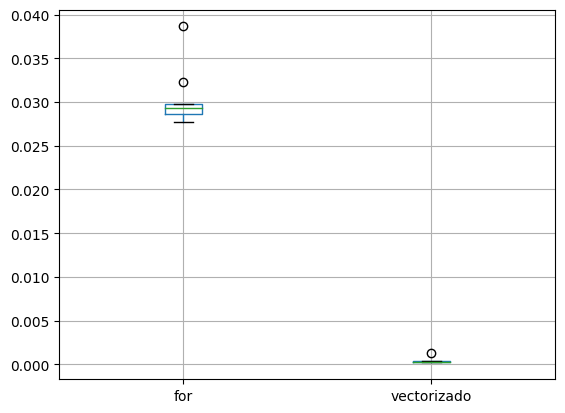

In [14]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo de un 'for' computacionalmente pesado
def calcular_suma_cuadrados(n):
  resultado = 0
  for i in range(n):
    resultado += i**2
  return resultado

# Vectorización con NumPy
def calcular_suma_cuadrados_vectorizado(n):
  numeros = np.arange(n)
  return np.sum(numeros**2)

def ejecutar_experimento(n):
  inicio = time.time()
  calcular_suma_cuadrados(n)
  fin = time.time()
  tiempo_for = fin - inicio

  inicio = time.time()
  calcular_suma_cuadrados_vectorizado(n)
  fin = time.time()
  tiempo_vectorizado = fin - inicio

  return tiempo_for, tiempo_vectorizado

def simular_experimentos(n, num_simulaciones):
  resultados = []
  for _ in range(num_simulaciones):
    resultados.append(ejecutar_experimento(n))
  return resultados

def analizar_resultados(resultados):
  df = pd.DataFrame(resultados, columns=['for', 'vectorizado'])
  print(df.describe())
  df.boxplot()
  plt.show()

# Ejemplo de uso
n = 100000
num_simulaciones = 10

resultados = simular_experimentos(n, num_simulaciones)
analizar_resultados(resultados)